In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정
import matplotlib.pyplot as plt
%matplotlib inline

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

 55000 10000 5000

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


### hyper parameter

In [2]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [3]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)

### 컨볼루션층 1

In [4]:
# 1번째 컨볼루션 층, 5x5x32 필터 
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  # standard deviation 표준편차 0.01 이내로 뽑음 -> 더 정교한 데이터
b2 = tf.Variable(tf.constant(0.1, shape=[32]))

# 1번째 컨볼루션 연산을 통해 28 x 28 x 1 => 28 x 28 x 32  흑백인 1개 층이 -> 32개 층을 거치게 됨
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 x 28 x 32 => 14 x 14 x 32  max pooling을 통해 4개를 1개로 묶어 가로 세로 2배씩 줄어들게 됨
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 2

In [5]:
# 2번째 컨볼루션 층
W3 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[64]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 3, pooling 없이

In [6]:
# 3번째 컨볼루션 층
W4 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.01))  
b4 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')

# relu
A4 = Z4 = tf.nn.relu(C4+b4)

### 완전연결층 Flatten

In [7]:
# 2X2 크기를 가진 256개의 activation map을 flatten 시킴
A4_flat = P4_flat = tf.reshape(A4, [-1, 128*7*7])

### 완전연결층2

In [8]:
# 256 개의 노드 완전연결
W5 = tf.Variable(tf.random_normal([128*7*7, 256], stddev=0.01))
b5 = tf.Variable(tf.random_normal([256]))

Z5 = tf.matmul(A4_flat, W5) + b5

A5 = tf.nn.relu(Z5)

### 출력층

In [9]:
# 출력층
W6 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b6 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z6, 즉 softmax 에 들어가는 입력 값
Z6 = logits = tf.matmul(A5, W6) + b6    # 선형회귀 값 Z6

y = A6 = tf.nn.softmax(Z6)

In [10]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z6, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [11]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A6, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A6, 1)

epochs =  0 , step =  0 , loss_val =  2.578572
epochs =  0 , step =  100 , loss_val =  1.3596042
epochs =  0 , step =  200 , loss_val =  0.3459197
epochs =  0 , step =  300 , loss_val =  0.11688562
epochs =  0 , step =  400 , loss_val =  0.1060114
epochs =  0 , step =  500 , loss_val =  0.090657614
epochs =  1 , step =  0 , loss_val =  0.050366692
epochs =  1 , step =  100 , loss_val =  0.07055423
epochs =  1 , step =  200 , loss_val =  0.07342895
epochs =  1 , step =  300 , loss_val =  0.06614749
epochs =  1 , step =  400 , loss_val =  0.033467893
epochs =  1 , step =  500 , loss_val =  0.047052763
epochs =  2 , step =  0 , loss_val =  0.043895945
epochs =  2 , step =  100 , loss_val =  0.07474868
epochs =  2 , step =  200 , loss_val =  0.0477523
epochs =  2 , step =  300 , loss_val =  0.10548714
epochs =  2 , step =  400 , loss_val =  0.10081036
epochs =  2 , step =  500 , loss_val =  0.11733855
epochs =  3 , step =  0 , loss_val =  0.007955786
epochs =  3 , step =  100 , loss_val = 

epochs =  26 , step =  0 , loss_val =  0.00076248107
epochs =  26 , step =  100 , loss_val =  1.6693819e-05
epochs =  26 , step =  200 , loss_val =  3.125891e-05
epochs =  26 , step =  300 , loss_val =  0.0012818887
epochs =  26 , step =  400 , loss_val =  4.16729e-06
epochs =  26 , step =  500 , loss_val =  0.0006491989
epochs =  27 , step =  0 , loss_val =  0.0007726215
epochs =  27 , step =  100 , loss_val =  0.00033478302
epochs =  27 , step =  200 , loss_val =  3.528582e-07
epochs =  27 , step =  300 , loss_val =  1.0488522e-05
epochs =  27 , step =  400 , loss_val =  2.1651764e-05
epochs =  27 , step =  500 , loss_val =  6.760452e-05
epochs =  28 , step =  0 , loss_val =  0.0022396094
epochs =  28 , step =  100 , loss_val =  5.773193e-06
epochs =  28 , step =  200 , loss_val =  0.0010005046
epochs =  28 , step =  300 , loss_val =  7.249549e-05
epochs =  28 , step =  400 , loss_val =  0.0029843256
epochs =  28 , step =  500 , loss_val =  0.013192865
epochs =  29 , step =  0 , loss

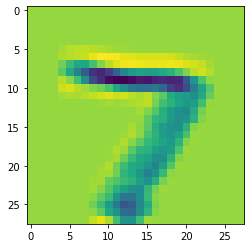

In [12]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    W2_val, W3_val, W4_val = sess.run([W2, W3, W4], feed_dict={X: test_x_data, T: test_t_data})
    C2_val, C3_val, C4_val = sess.run([C2, C3, C4], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    print('W2_val.shape = ', W2_val.shape, ', W3_val.shape = ', W3_val.shape, ', W4_val.shape = ', W4_val.shape)
    print('C2_val.shape = ', C2_val.shape, ', C3_val.shape = ', C3_val.shape, ', C4_val.shape = ', C4_val.shape)
        
    plt.imshow(C2_val[0, :, :, 12]) # C2에서 0번째 index image의 12번째 filter에 의한 그림 출력 (filter는 32개 있음)
    
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

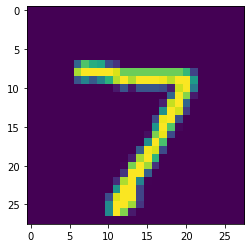

In [13]:
plt.imshow(test_x_data[0].reshape(28, 28))

In [14]:
# index_label_prediction_list
print(index_label_prediction_list)

[[115, 4, 9], [247, 4, 2], [340, 5, 3], [448, 9, 3], [582, 8, 2], [646, 2, 6], [659, 2, 1], [936, 8, 6], [947, 8, 9], [1014, 6, 5], [1033, 8, 1], [1112, 4, 6], [1128, 3, 7], [1232, 9, 4], [1260, 7, 1], [1393, 5, 3], [1414, 9, 7], [1554, 9, 7], [1901, 9, 8], [2035, 5, 3], [2043, 4, 8], [2109, 3, 2], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2293, 9, 4], [2387, 9, 1], [2414, 9, 4], [2462, 2, 0], [2582, 9, 7], [2597, 5, 3], [2654, 6, 1], [2678, 4, 9], [2720, 9, 8], [2896, 8, 0], [2939, 9, 5], [2953, 3, 5], [3225, 7, 9], [3343, 8, 2], [3422, 6, 0], [3475, 3, 7], [3520, 6, 4], [3558, 5, 0], [3808, 7, 2], [4163, 9, 7], [4176, 2, 7], [4207, 8, 2], [4497, 8, 2], [4500, 9, 1], [4504, 2, 7], [4699, 6, 1], [4731, 8, 7], [4823, 9, 4], [4860, 4, 9], [4874, 9, 0], [5654, 7, 2], [5655, 7, 2], [5937, 5, 3], [5955, 3, 8], [5997, 5, 9], [6166, 9, 5], [6173, 9, 8], [6576, 7, 1], [6597, 0, 7], [8065, 8, 0], [8520, 4, 9], [8527, 4, 9], [9505, 7, 2], [9619, 8, 2], [9642, 9, 7], [9664, 2, 7], [9669, 4, 1], 